<b><h1><center><font size="6">Cats or Dogs - using CNN with Transfer Learning</font></center></h1></b>
<center><img src="https://www.theladders.com/wp-content/uploads/dog-cat-190709-1000x563.jpg" width="900"></img></center>

## <b>1. | Introduction</b> 👋
  * Problem Overview 👨‍💻 </br>
    * 👉 <mark><b>Classifying cats and dogs images has been <mark><b>a popular task in the deep learning field</b></mark>.
    * 👉 There are <mark><b>many different "Cats and Dogs" datasets</b></mark>.
    * 👉 The objective is the same: <mark><b>train a convolutional neural network (CNN) able to successfully differentiate cats from dogs</b></mark>.
    * 👉 Therefore, <mark><b>it is a binary classification</b></mark>.
  * Dataset Description 🤔 </br>
    * 👉 The <mark><b>Dogs and Cats Dataset is taken from Kaggle 'CatsDogs' Dataset</b></mark>, <a href="https://www.kaggle.com/datasets/sanjoybijoy/catsanddogs">CatsDogs</a>.
    * 👉 This Dataset <mark><b>provides training folder and test folder with inside each folder has both dogs folder and cats folder respectively.</b></mark>.
  * Methods 🧾 </br>
    * 👉 can <mark><b>use TensorFlow to create a data generator with a validation set split and focus on training the dense layers of the model</b></mark>.
    * 👉 <a href="https://en.wikipedia.org/wiki/Transfer_learning">Transfer learning</a> <mark><b>consists of copying the weights and architecture of a network, while maintaining or retraining some of its layers for particular needs</b></mark>. It is <mark><b>recurrently used to save model building time by using weights from models already trained in other more general datasets</b></mark>.
    * 👉 In our case, <mark><b>cats and dogs are our classes</b></mark>, which are also part of the more general <a href="https://www.image-net.org/">ImageNet</a> dataset. This means that we <mark><b>can pick any CNN trained using ImageNet to get a warm start at training our own model</b></mark>.
  * Analysis Introduction 🔎 </br>
    * 👉 <a href="https://en.wikipedia.org/wiki/Residual_neural_network">ResNet-50</a> is a somewhat old, but still very popular, CNN. Its <mark><b>popularity come from the fact that it was the CNN that introduced the residual concept in deep learning</mark></b>. It <mark><b>also won the</mark></b> <a href="https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8">ILSVRC 2015</a> <mark><b>image classification contest</mark></b>. Since it is a well-known and very solid CNN, we decided to use it for our transfer learning task.
    * 👉 As the <mark><b>original ResNet-50 was trained on ImageNet</mark></b>, <mark><b>its last layer outputs 1000 probabilities for a tested image to belong to the 1000 different ImageNet classes</mark></b>. Therefore, we <mark><b>cannot directly use it in our binary classification problem with only cats and dogs as classes</mark></b>. Nonetheless, <mark><b>using the original weights of the network would give us a model that is too generalistic and not really built to understand cats and dogs</mark></b>.
    * 👉 We <mark><b>first transfer a base ResNet-50 CNN</mark></b>, that is, <mark><b>a ResNet-50 without its fully connected layers</mark></b>. Later, <mark><b>by freezing the base ResNet-50 weights</mark></b>, we <mark><b>add new layers and train them without changing anything in the convolutional section of the network</mark></b>.
    * 👉 In this case, <mark><b>the convolutional section becomes just an image feature extractor</mark></b> and <mark><b>the actual job of classifying the features is performed by the newly added fully connected layers</mark></b>.
    * 👉 After many experiments, an optimal architecture was found. It <mark><b>achieves 95% train accuracy and 91% validation accuracy in our cats and dogs training set</mark></b>. In this project's notebook, we show how to build and train this CNN.

## <b>2. | Accuracy of Best Model</b> 🧪
Transfer Learning ResNet50
- Accuracy achieved: 95.46%

## <b>3. | Conclusiion </b> 📤
- In this study respectively,
- We have loaded a ResNet-50 model trained using the ImageNet dataset.
- With this transferred ResNet-50 we can perform tests using any image having 224x224 resolution.
- After loading the image that we want to use, we need to preprocess the image using the same method used in ResNet-50's training. Fortunately, TensorFlow gives us a function to do exactly so.
- Lastly, we can use the trained ResNet-50 to predict the class of the preprocessed image. Since it is trained on ImageNet, it is going to return 1000 scores in a list, one for each ImageNet class.

## <b>5. | Reference</b> 🔗
<ul><b><u>Github Notebook 📚</u></b>
        <li><a style="color: #3D5A80" href="https://github.com/guilhermedom/resnet50-transfer-learning-cats-and-dogs">resnet50-transfer-learning-cats-and-dogs
 by GUILHERMEDOM</a></li>
</ul>

<ul><b><u>Online Learning Channel 🌏</u></b>
        <li><a style="color: #3D5A80" href="https://www.udemy.com/course/artificial-intelligence-in-python-/learn/lecture/26598012#overview">Master Artificial Intelligence 2022 : Build 6 AI Projects by Dataisgood Academy</a></li>   
</ul>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
# drive.mount('gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pwd
os.chdir("/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/b.ConvolutionalNeuralNetwork")
!pwd
!ls '/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/b.ConvolutionalNeuralNetwork'

/content
/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/b.ConvolutionalNeuralNetwork
0.dataset  1.BinaryClassification


In [ ]:
# !wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

In [ ]:
# !unzip -q "./dataset/kagglecatsanddogs_5340.zip"

In [ ]:
# !ls "PetImages/"

In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/1.Knowledge/@b4.DeepLearning/b.ConvolutionalNeuralNetwork'

### Importing the libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
from random import shuffle
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers.experimental.preprocessing import Resizing, RandomRotation, RandomFlip, RandomTranslation, RandomZoom
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2

### Variables Initialization

In [ ]:
# Define IMAGE SIZE and BATCH SIZE
IMG_SIZE = 224
BATCH_SIZE = 128
SEED = 42

### User-Defined Functions

In [ ]:
# Function used to decode jpeg into Tensor
def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    return image, label

In [ ]:
# Function used to form new path by reading and decoding JPEG images
  # and neglect those parts that throws error while decoding and proceed the remaining parts
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try :
            # image = tf.io.read_file(path)
            # image = tf.io.decode_jpeg(image, channels=3)
            image = load(path, None)
        except :
            continue
        new_all_paths.append(path)
    return new_all_paths

In [ ]:
# Function used to get image labels
def get_label(image_path):
    return image_path.split("/")[-2]

In [ ]:
# Tensorflow Function used to perform image transformation and augmentation
# Basic Transformation
resize = tf.keras.Sequential([
    Resizing(IMG_SIZE, IMG_SIZE)
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal", seed=SEED),
    RandomRotation(0.2, seed=SEED),
    RandomZoom(height_factor=(-0.3, -0.2), seed=SEED) # postive: zoom out, negative: zoom in, height_factor=(x,y): x to y and vice versa
])

In [ ]:
# Function used to create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train=True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [ ]:
# Function to load test image
def LoadTestImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0)
    return image

# Function to predict real time test image
def RealtimePrediction(image_path , model, encoder_):
    image = LoadTestImage(image_path)
    prediction = model.predict(image)
    prediction = np.array([int(np.floor(prediction[0][0]) if prediction[0][0] < 0.5 else np.ceil(prediction[0][0]))])
    return encoder_.inverse_transform(prediction)[0]

### Importing the Datasets

In [ ]:
# Training abd Test Paths Dataset
DataPath = pathlib.Path("./0.dataset/dogs_or_cats_dataset/training_set")
all_paths = DataPath.glob("*/*.jpg")
all_paths = list(all_paths)

In [ ]:
all_paths[:3]

[PosixPath('0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3700.jpg'),
 PosixPath('0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3706.jpg'),
 PosixPath('0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.370.jpg')]

In [ ]:
all_paths = list(map(lambda x: str(x) , all_paths))

In [ ]:
all_paths[:3]

['0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3700.jpg',
 '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3706.jpg',
 '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.370.jpg']

In [ ]:
all_paths = TestImageQuality(all_paths)

100%|██████████| 8010/8010 [30:58<00:00,  4.31it/s]


In [ ]:
all_paths[:3]

['0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3700.jpg',
 '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.3706.jpg',
 '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.370.jpg']

### Feature Engineering

In [ ]:
# Getting their respective labels
all_labels = list(map(lambda x: get_label(x) , all_paths))
all_labels[:3]

['dogs', 'dogs', 'dogs']

In [ ]:
Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)
all_labels[:3]

array([1, 1, 1])

### Train Test Split

In [ ]:
Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(all_paths, all_labels)

In [ ]:
Train_paths[:3], Train_labels[:3]

(['0.dataset/dogs_or_cats_dataset/training_set/cats/cat.1104.jpg',
  '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.2906.jpg',
  '0.dataset/dogs_or_cats_dataset/training_set/dogs/dog.516.jpg'],
 array([0, 1, 1]))

### Data Augmentation and Obtain Data

In [ ]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 638 ms, sys: 17.8 ms, total: 656 ms
Wall time: 662 ms
(128, 224, 224, 3)
(128,)


cats


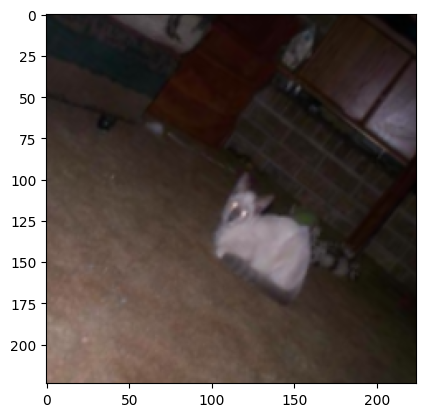

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(label)[108])
plt.imshow((image[108].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 31.1 ms, sys: 897 µs, total: 32 ms
Wall time: 30.8 ms
(128, 224, 224, 3)
(128,)


dogs


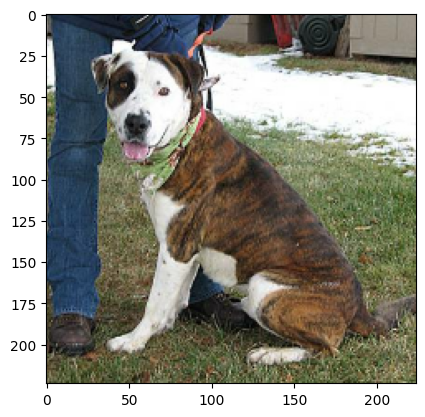

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(label)[28])
plt.imshow((image[28].numpy()/255).reshape(224 , 224 , 3))

### Model Build and Model Training

In [ ]:
# Building ResNet50 model
backbone = ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False           # To exclude the last layer of ResNet50
)

model = tf.keras.Sequential([
    backbone,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

94668760/94668760 [==============================] - 4s 0us/step


In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 23521409 (89.73 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
46/46 [==============================] - 102s 1s/step - loss: 0.3368 - accuracy: 0.8517 - val_loss: 1.1778 - val_accuracy: 0.5266
Epoch 2/10
46/46 [==============================] - 69s 1s/step - loss: 0.2233 - accuracy: 0.9092 - val_loss: 2.7138 - val_accuracy: 0.5172
Epoch 3/10
46/46 [==============================] - 57s 1s/step - loss: 0.1758 - accuracy: 0.9299 - val_loss: 0.7104 - val_accuracy: 0.7578
Epoch 4/10
46/46 [==============================] - 56s 1s/step - loss: 0.1750 - accuracy: 0.9243 - val_loss: 0.6783 - val_accuracy: 0.7104
Epoch 5/10
46/46 [==============================] - 57s 1s/step - loss: 0.1693 - accuracy: 0.9338 - val_loss: 0.8385 - val_accuracy: 0.5391
Epoch 6/10
46/46 [==============================] - 57s 1s/step - loss: 0.1439 - accuracy: 0.9485 - val_loss: 0.7932 - val_accuracy: 0.6766
Epoch 7/10
46/46 [==============================] - 58s 1s/step - loss: 0.1312 - accuracy: 0.9476 - val_loss: 0.2303 - val_accuracy: 0.9062
Epoch 8/10
46/46 [=

### Model Evaluation

In [ ]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc: " , acc)
print(" Testing Loss: " , loss)

16/16 [==============================] - 12s 654ms/step - loss: 0.1974 - accuracy: 0.9171
 Testing Acc :  0.917124330997467
 Testing Loss :  0.19739605486392975


### Model Prediction

In [ ]:
# Training abd Test Paths Dataset
DataTestPath = pathlib.Path("./0.dataset/dogs_or_cats_dataset/")
all_test_paths = DataTestPath.glob("*.jpg")
all_test_paths = list(all_test_paths)
all_test_paths[:3]

[PosixPath('0.dataset/dogs_or_cats_dataset/dog_or_cat01.jpg'),
 PosixPath('0.dataset/dogs_or_cats_dataset/dog_or_cat02.jpg'),
 PosixPath('0.dataset/dogs_or_cats_dataset/dog_or_cat03.jpg')]

In [ ]:
all_test_paths = list(map(lambda x: str(x), all_test_paths))
all_test_paths[:3]

['0.dataset/dogs_or_cats_dataset/dog_or_cat01.jpg',
 '0.dataset/dogs_or_cats_dataset/dog_or_cat02.jpg',
 '0.dataset/dogs_or_cats_dataset/dog_or_cat03.jpg']

1/1 [==============================] - 0s 23ms/step


'cats'

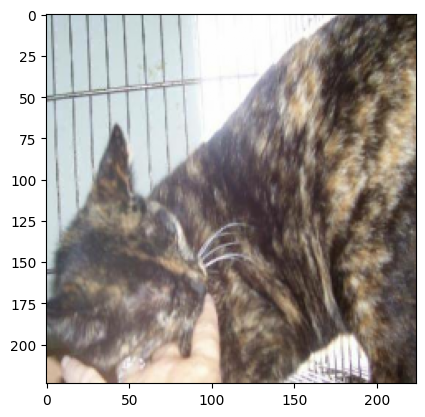

In [ ]:
# Make prediction
test_image = all_test_paths[0]
RealtimePrediction(test_image, model, Le)

1/1 [==============================] - 0s 24ms/step


'cats'

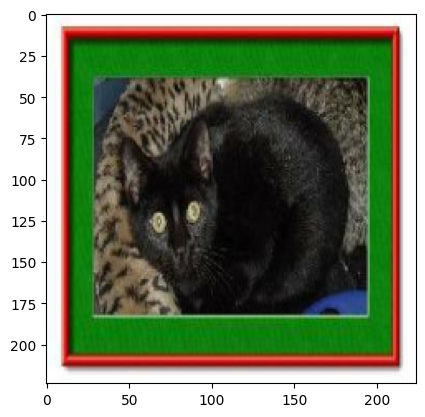

In [ ]:
test_image = all_test_paths[2]
RealtimePrediction(test_image, model, Le)

1/1 [==============================] - 0s 24ms/step


'dogs'

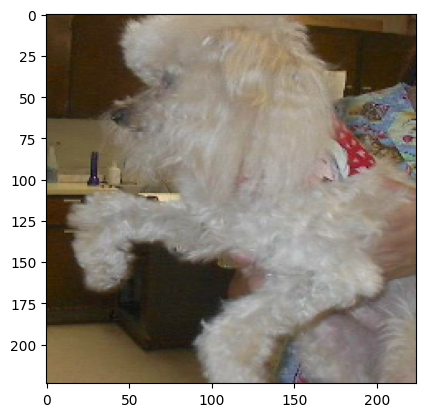

In [ ]:
test_image = all_test_paths[5]
RealtimePrediction(test_image, model, Le)

1/1 [==============================] - 0s 37ms/step


'dogs'

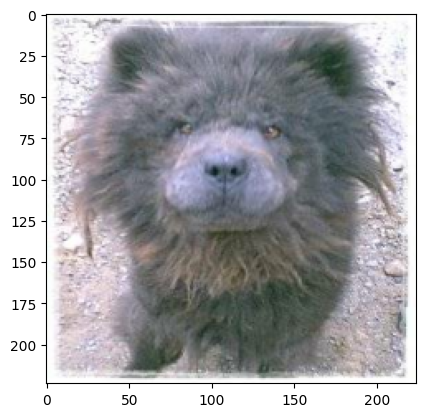

In [ ]:
test_image = all_test_paths[6]
RealtimePrediction(test_image, model, Le)